In [2]:
#import networkx as nx
#import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import matplotlib.pyplot.legend


In [3]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def ruleTwo(num):
        result = (num-1)/2
        r = 0
        k = 0

        while result % 2 != 0:
            result = (result-1)/2
            k+=1

        r = result/2

        if ((k) % 2 == 0 and r % 2 == 0) or ((k) % 2 != 0 and r % 2 != 0):
            return (True)
        else:
            return (False)

##################################################new

def includeNumber(numberArr, number):

    if len(numberArr) > 0:
        #numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            
            if numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] < number:
            numberArr.insert((i+1), number)
        else:
            numberArr.insert((i), number)
    else:
        numberArr.append(number)


    return numberArr

def isIncluded(numberArr, number):
    # for i in arr:
    #     if i == num:
    #         return True
        
    # return False
    if len(numberArr) > 0:
        #numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                return True
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
        if numberArr[i] == number:
            return True
        else:
            return False
    else:
        return False

def removeNumber(numberArr, number):

    if len(numberArr) > 0:
        #numberArr.sort()
        
        left = int(0)
        right = int(len(numberArr)-1)
        i = int(0)
        
        
        while left <= right:
            
            i = int((left + right)/2)
            if numberArr[i] == number:
                numberArr.pop(i)
                break
            
            elif numberArr[i] < number:
                left = i+1
            else:
                right = i-1
        
            
    return numberArr




#######################################old
# def isIncluded(numberArr, number):
#     # for i in arr:
#     #     if i == num:
#     #         return True
        
#     # return False
#     if len(numberArr) > 0:
#         numberArr.sort()
        
#         left = int(0)
#         right = int(len(numberArr)-1)
#         i = int(0)
        
        
#         while left <= right:
            
#             i = int((left + right)/2)
#             if numberArr[i] == number:
#                 return True
            
#             elif numberArr[i] < number:
#                 left = i+1
#             else:
#                 right = i-1
        
            
#         if numberArr[i] == number:
#             return True
#         else:
#             return False
#     else:
#         return False

def getType(label):
    if (label + 1) % 3 == 0:
        return 1
    elif label % 3 == 0:
        return 2
    elif (label - 1) % 3 == 0:
        return 3
    return -1

arrInfo = []
rowStartLabel = []
saveArrInfo = []

def setStartArr(n):
    for i in range(0,n):
        if i == 0:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(1)
        elif i == 1:
            arrInfo.append(0)
            saveArrInfo.append(0)
            rowStartLabel.append(3)
        elif i == 2:
            arrInfo.append(1)
            saveArrInfo.append(1)
            rowStartLabel.append(5)
        else:
            arrInfo.append(2**(i-1))
            saveArrInfo.append(2**(i-1))
            rowStartLabel.append(2**i + 1)

        #blue_expenses.append(0)

    return arrInfo, saveArrInfo, rowStartLabel#, blue_expenses


def numbersAbove(arrOne, arrTwo, row):
    count = 0
    
    for i in range(row, len(arrOne)):
        count += (arrOne[i]-arrTwo[i])

    return count

def getCounter(rowStartLabel, value):
    
    counter = 0
    
    for start in rowStartLabel:
        if counter != len(rowStartLabel):
            if value < rowStartLabel[counter]:
                break
            else:
                counter = counter + 1
        elif counter == len(rowStartLabel):
            break

    return counter


[88, 158, 373, 735, 1430, 2725, 5618, 11441, 22529, 45725, 91491, 183946, 367659, 735535, 1472578]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


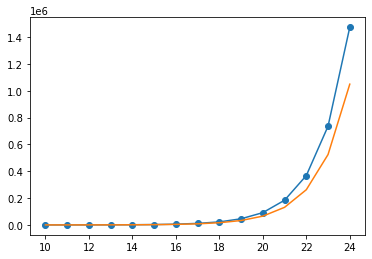

<function matplotlib.pyplot.show(*args, **kw)>

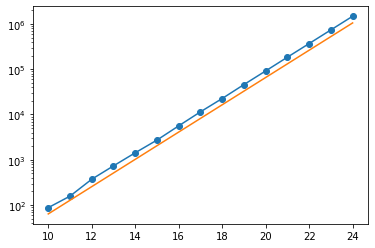

In [5]:
# Rules
# Change n to choose size of Tree


save_loop = []

for i in range(10,25):


    n=i




    expenses = []
    rows = []
    big_leaf = (2**n)-1
    used = []
    proven = []

    start = 31

    #proven.append(3)
    #proven.append(5)
    #proven.append(19)
    arrInfo = []
    proven.append(start)
    rowStartLabel = []
    saveArrInfo = []
    arrInfo, saveArrInfo, rowStartLabel = setStartArr(n)
    counter = 0
    totalNumber = 0

    #print(arrInfo)





    while len(proven) > 0:
        #proven.sort()
        #print(proven)
        totalNumber += 1
        for i in proven:   
            if isIncluded(used, i) == False:       
                
                # RULE 1 : if x is orange V(x) becomes orange 
                if V(i) <= big_leaf + 1:                
                    value1 = V(i)
                    counter = 0
                    
                    if isIncluded(used, value1) == False:
                        proven = includeNumber(proven, V(i))                 
                        counter = getCounter(rowStartLabel, value1)
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

                # RULE 2 : if x is orange S(x) becomes orange (under the precise conditions of rule 2)
                r2 = ruleTwo(i)
                if r2: 
                    
                    if S(i) <= big_leaf + 1:
                        value2 = S(i)
                        counter = 0
                        
                        if isIncluded(used, value2) == False:
                            proven = includeNumber(proven, S(i))
                            counter = getCounter(rowStartLabel, value2)
                            arrInfo[counter-1] -= 1

                            if arrInfo[counter-1] == 0:
                                expense = numbersAbove(saveArrInfo, arrInfo, counter)
                                expenses.append(expense)
                                rows.append(counter)
                                print("{0}: {1}".format(counter, expense))
                                print("{0}".format(arrInfo))

                # # RULE 3 : if x is orange and of type C then (4x-1)/3 becomes orange
                if getType(i) == 3:             
                    value3 = int((4*i-1)/3)
                    counter = 0
                    
                    if value3 <= big_leaf + 1:  
                        
                        if isIncluded(used, value3) == False:
                            proven = includeNumber(proven, value3)
                            counter = getCounter(rowStartLabel, value3)                     
                            arrInfo[counter-1] -= 1
                            
                            if arrInfo[counter-1] == 0:
                                expense = numbersAbove(saveArrInfo, arrInfo, counter)
                                expenses.append(expense)
                                rows.append(counter)
                                print("{0}: {1}".format(counter, expense))
                                print("{0}".format(arrInfo))

                # # RULE 4 : if x is orange and of type A then G(x)/3 becomes orange                   
                if getType(i) == 1:                       
                    value4 = int(fG(i)/3)                                     
                    
                    if isIncluded(used, value4) == False:   
                        proven = includeNumber(proven, value4)
                        #print(value4)
                        counter = 0 
                        counter = getCounter(rowStartLabel, value4)               
                        arrInfo[counter-1] -= 1
                        
                        if arrInfo[counter-1] == 0:
                            expense = numbersAbove(saveArrInfo, arrInfo, counter)
                            expenses.append(expense)
                            rows.append(counter)
                            print("{0}: {1}".format(counter, expense))
                            print("{0}".format(arrInfo))

                proven = removeNumber(proven, i)
                used = includeNumber(used, i)
                break
            else:
                proven = removeNumber(proven, i)

    save_loop.append(totalNumber)



print(save_loop)





import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np

expenses = save_loop
rows = []



for i in range(10,n+1):
    rows.append(i)

print(rows)

#for i in range(0, len(expenses)):
#    expenses[i] = expenses[i]/100000

comparex2 = []
comparex2.append(2**6)
counter = 0
for i in rows:
    if i != rows[0]:
        comparex2.append(comparex2[counter]*2)
        counter += 1



plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.plot(rows, comparex2, linestyle = 'solid', label="2^x")
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%.0f"))
plt.show()
#plt.savefig("expanses.png",dpi=300)

plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.plot(rows, comparex2, linestyle = 'solid', label="2^x")
plt.show



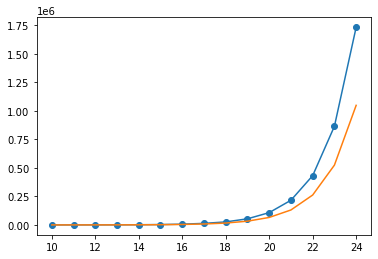

NameError: name 'expenses' is not defined

In [3]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np

expenses161 = [105, 189, 422, 885, 1706, 3258, 6715, 13518, 26430, 53630, 107850, 216255, 432027, 864941, 1733344]
#expenses1457 = [22,43,71,146,249,441, 849,1804,4232,8317,16584,34660,69917,139225,274845]
rows = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]



#for i in range(0, len(expenses)):
#    expenses[i] = expenses[i]/100000

comparex2 = []
comparex2.append(2**6)
counter = 0
for i in rows:
    if i != rows[0]:
        comparex2.append(comparex2[counter]*2)
        counter += 1



plt.plot(rows, expenses161, marker = 'o', linestyle = 'solid')
plt.plot(rows, comparex2, linestyle = 'solid', label="2^x")
#plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter("%.0f"))
plt.show()
#plt.savefig("expanses.png",dpi=300)

plt.yscale('log')
plt.plot(rows, expenses, marker = 'o', linestyle = 'solid')
plt.plot(rows, comparex2, linestyle = 'solid', label="2^x")
plt.show